1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

    Рассчет с интерсептом:

In [10]:
b1=(np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.mean(zp**2)-np.mean(zp)**2)
b0=np.mean(ks)-b1*np.mean(zp)
print(f'Коэффициенты b0 = {b0}, b1 = {b1}')

Коэффициенты b0 = 444.1773573243596, b1 = 2.620538882402765


    Рассчет без интерсепта:

In [11]:
b=np.sum(zp*ks)/np.sum(zp**2)
print(f'Коэффициент b = {b}')

Коэффициент b = 5.889820420132689


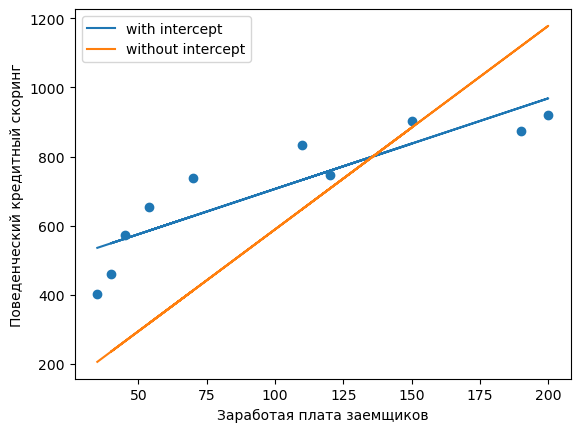

In [18]:
plt.scatter(zp, ks)
plt.xlabel('Заработая плата заемщиков')
plt.ylabel('Поведенческий кредитный скоринг', rotation = 90)
plt.plot(zp, b0+b1*zp, label='with intercept')
plt.plot(zp, b*zp,  label='without intercept')
plt.legend()
plt. show()

Графики говорят о наличии линейной зависимости, модель с интерсептом ближек реальным данным, чем модель без интерсепта.

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [31]:
def mse_(b, x, y, n):
    return np.sum((b*x -y)**2)/n

alpha = 1e-7
b = 0.1
n = len(zp)

for i in range(10**4):
    b -= alpha * (2/n) * np.sum((b*zp -ks)*zp)
    if i % 10**3==0:
        print(f'Итерация {i}: b= {b}, mse={mse_(b, zp, ks, n)}')

Итерация 0: b= 0.115952808, mse=515794.9112047831
Итерация 1000: b= 5.524061455274668, mse=58359.886733764004
Итерация 2000: b= 5.866650574656343, mse=56524.254269626384
Итерация 3000: b= 5.888352672815523, mse=56516.888094403395
Итерация 4000: b= 5.889727442292625, mse=56516.85853481644
Итерация 5000: b= 5.889814530236905, mse=56516.85841619732
Итерация 6000: b= 5.8898200470236475, mse=56516.85841572132
Итерация 7000: b= 5.889820396497239, mse=56516.85841571941
Итерация 8000: b= 5.889820418635448, mse=56516.85841571941
Итерация 9000: b= 5.889820420037843, mse=56516.85841571939


Коэффициент b, полученный методом градиентного спуска, равен b, полученному из формул.

3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [42]:
def mse(b0, b1, x, y, n):
        return np.sum((b0+b1*x)-y)**2/n
alpha=0.000015
b0=0.1
b1=0.1
n=len(zp)
for i in range (3000000):
    b0-=alpha*(2/n)*np.sum((b0+b1*zp)-ks)
    b1-=alpha*(2/n)*np.sum(((b0+b1*zp)-ks)*zp)
    if i%200000==0:
        print(f'i ={i}, b0 = {b0}, b1 = {b1}, mse = {mse}')

i =0, b0 = 0.12098980000000001, b1 = 2.4925531490284, mse = <function mse at 0x0000016D9D4DE830>
i =200000, b0 = 347.25130558894756, b1 = 3.3339520480332587, mse = <function mse at 0x0000016D9D4DE830>
i =400000, b0 = 423.0197091126471, b1 = 2.776267342582058, mse = <function mse at 0x0000016D9D4DE830>
i =600000, b0 = 439.5589284310346, b1 = 2.654532302314479, mse = <function mse at 0x0000016D9D4DE830>
i =800000, b0 = 443.16921666386423, b1 = 2.627959186924899, mse = <function mse at 0x0000016D9D4DE830>
i =1000000, b0 = 443.9572938320301, b1 = 2.622158634676706, mse = <function mse at 0x0000016D9D4DE830>
i =1200000, b0 = 444.1293204357116, b1 = 2.6208924524511046, mse = <function mse at 0x0000016D9D4DE830>
i =1400000, b0 = 444.16687152025344, b1 = 2.6206160619697405, mse = <function mse at 0x0000016D9D4DE830>
i =1600000, b0 = 444.17506841492843, b1 = 2.620555729659967, mse = <function mse at 0x0000016D9D4DE830>
i =1800000, b0 = 444.1768576863434, b1 = 2.6205425599314838, mse = <function

Задачи с семинара.

6. Какой должна быть численность групп, чтобы с вероятностью 90% 
обнаруживать снижение летальности с 90 до 30%. Уровень 
значимости α = 0,05. При решении вам пригодятся табличные 
значения стандартного нормального распределения

Решение нашла здесь) https://seamed.bmoc-spb.ru/jour/article/viewFile/373/351

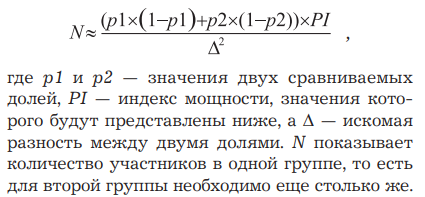

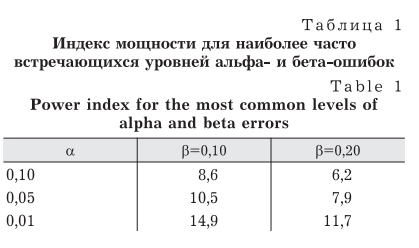


In [8]:
alpha=0.05
B=0.9
PI=10.5 #по таблице выше для alpha и B
p1=0.9
p2=0.3
N=(p1*(1-p1)+p2*(1-p2))*PI/((p1-p2)**2)
print(f'Размер выборок равен {N}')

Размер выборок равен 8.749999999999998


7. Из 10 билетов выигрышными являются 2. Чему равна вероятность того, что среди взятых наудачу 5 билетов два выигрышных?

In [4]:
from math import comb
p=comb(2,2)*comb(8,3)/comb(10,5)
p

0.2222222222222222

8. Вероятность рождения мальчиков 0.515. Найти наивероятнейшее число девочек из 600 новорожденных.

In [5]:
p=1-0.515
n=600
k0=p*n+p
k0

291.485

9. Какова вероятность наступления события B в каждом отдельном испытании, если наивероятнейшее число наступления события B в 120 испытаний составило 32.

In [7]:
n=120
k0=32
p=k0/(n+1)
p

0.2644628099173554